# Introduction to the Monte Carlo method

Start by defining the Gibbs distribution:
$$P(\alpha) = e^{-E(\alpha)/kT}$$
this expression, defines the probability of observing a particular configuration of spins, $\alpha$. 
As you can see, the probability of $\alpha$ decays exponentially with increasing energy of $\alpha$, $E(\alpha)$,
where $k$ is the Boltzmann constant, $k = 1.38064852 \times 10^{-23} J/K$
and $T$ is the temperature in Kelvin. 

## What defines the energy of a configuration of spins? 
Given a configuration of spins (e.g., $\uparrow\downarrow\downarrow\uparrow\downarrow$) we can define the energy using what is referred to as an Ising Hamiltonian:
$$ \hat{H}' = \frac{\hat{H}}{k} = \frac{J}{k}\sum_{<ij>} s_is_j,$$
where, $s_i=1$ if the $i^{th}$ spin is `up` and $s_i=-1$ if it is `down`, and the brackets $<ij>$ indicate a sum over spins that are connected,
and $J$ is a constant that determines the energy scale. 
The energy here has been divided by the Boltzmann constant to yield units of temperature. 
Let's consider the following case, which has the sites connected in a single 1D line:
$$\alpha = \uparrow-\downarrow-\downarrow-\uparrow-\downarrow.$$ 
What is the energy of such a configuration?
$$ E(\alpha)' = J/k(-1 + 1 - 1 - 1) = \frac{E(\alpha)}{k} = -2J/k$$

## Properties
For any fixed state, $\alpha$, the `magnetization` ($M$) is proportional to the _excess_ number of spins pointing up or down while the energy is given by the
Hamiltonian:
$$M(\alpha) = N_{\text{up}}(\alpha) - N_{\text{down}}(\alpha).$$
As a dynamical, fluctuating system, each time you measure the magnetization, the system might be in a different state ($\alpha$) and so you'll get a different number!
However, we already know what the probability of measuring any particular $\alpha$ is, so in order to compute the average magnetization, $\left<M\right>$, we just need to multiply the magnetization of each possible configuration times the probability of it being measured, and then add them all up!
$$ \left<M\right> = \sum_\alpha M(\alpha)P(\alpha).$$
In fact, any average value can be obtained by adding up the value of an individual configuration multiplied by it's probability:
$$ \left<E\right> = \sum_\alpha E(\alpha)P(\alpha).$$

This means that to obtain any average value (also known as an `expectation value`) computationally, we must compute the both the value and probability of all possible configurations. This becomes extremely expensive as the number of spins ($N$) increases. 

[95, 86, 40]
 Initialized config to:  [1 1 1 0 0 0 0 1 1 0]
nick 5


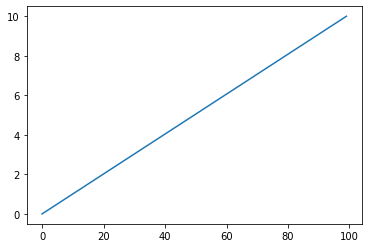

In [8]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import montecarlo
import random

# boltzmann constant, k = 1.38064852 × 10-23 m^2 kg s-2 K-1
energies = np.linspace(0, 10, 100);

N = 10
print(random.sample(range(1, 100), 3))
plt.plot(energies)

conf = montecarlo.SpinConfig1D(N=N)
conf.initialize(M=5)
ham = montecarlo.IsingHamiltonian1D(1.0, [1 for i in range(N)], 1.01)



# Question 1
How many configurations are possible for:

(a) N=10?

(b) N=100?

(c) N=1000?

# Sampling
These calculation pose a drastic problem from a practical perspective. 
 As $N$ becomes large it is evident that
computations become a daunting task if calculated in this manner.
 Thus a better numerical alternative would be to use a simulation to generate data over
the ‘representative states’. 
Because each computed value of a configuration gets weighted by it's probability, very high energy states (which have negligible probabilities due to the Boltzmann distribution) will not contribute to the overall sum.  
This is a form of biased sampling which
essentially boils down to satisfying the following condition where
`generated frequency` = `actual probability`.

An expectation value of any quantity, $A$, computed (using the Canonical Ensemble) can also be defined as:
$$\left<A\right> = \frac{1}{Z}\int e^{-E(\alpha)/T}A(\alpha)d\alpha,$$
where $Z$ is referred to as the `partition function`, and is essentially a normalization constant:
$$ Z = \int e^{-E(\alpha)/T}d\alpha,$$ and
$$ P(\alpha) = \frac{1}{Z}e^{-E(\alpha)/T}.$$
This probability gives the actual statistical weight with which the configuration
$\alpha$ occurs in the thermal equilibrium. We now want to consider the discrete case
of the formal definitions above. If we are to consider a finite portion of the
configuration space it would produces an average of the form:
$$
\left<A\right> = \frac{\displaystyle\sum_\alpha e^{-E'(\alpha)/T}A(\alpha)}{\displaystyle\sum_\alpha e^{-E'(\alpha)/T}}$$

We could choose to randomly `sample` from this full set of configurations, but this will not converge quickly. 

In [2]:
import numpy as np
import matplotlib as mpl

# boltzmann constant, k = 1.38064852 × 10-23 m^2 kg s-2 K-1
energies = np.linspace(0, 10, 100);



Metropolis referenced from: [here](https://arxiv.org/pdf/0803.0217.pdf)
